In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn_pandas import DataFrameMapper
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import joblib
from collections import Counter
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import main csv 
beer_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/PredictivePandas/data/final_beerdata_binary.gz", compression="gzip")

In [3]:
# import alternaive csv to all for Dense Vector analysis 
taste = pd.read_csv("taste_vector.csv")
taste.rename(columns = {'beer_beerid': 'beer_id'}, inplace=True)

In [4]:
beer_new = pd.merge(beer_csv, taste, on="beer_id", how="left")

In [5]:
# Columns needed for Flavor Vector
cols2 = [
'grainy',
 'sweet',
 'hay',
 'straw',
 'cracker',
 'bicuity',
 'caramel',
 'toast',
 'roast',
 'coffee',
 'espresso',
 'burnt',
 'alcohol',
 'tobacco',
 'gunpowder',
 'leather',
 'pine',
 'grass',
 'raisins',
 'currant',
 'plum',
 'dates',
 'prunes',
 'figs',
 'blackberry',
 'blueberry',
 'banana',
 'pineapple',
 'apricot',
 'pear',
 'apple',
 'nectarine',
 'peach',
 'mango',
 'lemon',
 'lime',
 'orange',
 'tangerine',
 'clementine',
 'grapefruit',
 'zest',
 'metallic',
 'vinegar',
 'copper',
 'cidery',
 'astringent',
 'chlorine',
 'phenolic',
 'pepper',
 'clove',
 'anise',
 'licorice',
 'bacon',
 'fatty',
 'nutty',
 'butterscotch',
 'vanilla',
 'earthy',
 'woody',
 'bread',
 'saddle',
 'musty',
 'barnyard',
 'honey',
 'chestnut',
 'black',
 'garnet',
 'ruby',
 'brilliant',
 'hazy',
 'cloudy',
 'turbid',
 'opaque',
 'clear',
 'crystal',
 'bright',
 'dull',
 'persistent',
 'rocky',
 'large',
 'fluffy',
 'dissipating',
 'lingering',
 'white',
 'tan',
 'frothy',
 'delicate',
 'roasted',
 'bready',
 'bitter',
 'spicy',
 'fruity',
 'chocolate',
 'toffee',
 'tart',
 'subtle',
 'woodsy',
 'sulfuric',
 'assertive',
 'mild',
 'bold',
 'balanced',
 'robust',
 'intense',
 'harsh',
 'complex',
 'refined',
 'hearty',
 'smooth',
 'silky',
 'velvety',
 'prickly',
 'tingly',
 'creamy',
 'warming',
 'viscous',
 'oily',
 'Malty',
 'biscuity',
 'breadlike',
 'rich',
 'deep',
 'roasty',
 'cereal',
 'cookie',
 'coffeeish',
 'caramelly',
 'molasses',
 'complexity',
 'smoky',
 'autumnal',
 'cream',
 'milk',
 'oatmeal',
 'rustic',
 'layered',
 'piney',
 'citrusy',
 'grapefruity',
 'sharp',
 'fresh',
 'herbal',
 'zippy',
 'lemony',
 'aromatic',
 'floral',
 'springlike',
 'sprucelike',
 'juniper',
 'minty',
 'pungent',
 'elegant',
 'grassy',
 'baked',
 'bubblegum',
 'yeasty',
 'belgian',
 'tropical',
 'clean',
 'soft',
 'effervescent',
 'spritzy',
 'sparkling',
 'pinpoint',
 'bubbly',
 'gentle',
 'carbonation',
 'full',
 'light',
 'slick',
 'heavy',
 'dry',
 'thick',
 'thin']

In [6]:
# Columns needed for Scores vector
cols1= ['beer_abv',
 'numberof_reviews',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste', 
 'beer_style_ale',
 'beer_style_barleywine',
 'beer_style_bitter',
 'beer_style_exotic',
 'beer_style_ipa',
 'beer_style_k√∂lsch',
 'beer_style_lager',
 'beer_style_pilsener',
 'beer_style_porter',
 'beer_style_stout',
 'beer_style_trappist',
 'beer_strength_Full',
 'beer_strength_Heavy',
 'beer_strength_Light',
 'beer_strength_Mid',
 'beer_strength_Very Strong',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Belgium',
 'country_Bosnia and Herzegovina',
 'country_Brazil',
 'country_Bulgaria',
 'country_Canada',
 'country_Cayman Islands',
 'country_China',
 'country_Colombia',
 'country_Costa Rica',
 'country_Czechia',
 'country_Denmark',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Funatsu',
 'country_Georgia',
 'country_Germany',
 'country_Greece',
 'country_Hong Kong',
 'country_India',
 'country_Indian Ocean',
 'country_Indonesia',
 'country_Ireland',
 'country_Israel',
 'country_Italy',
 'country_Jammu and Kashmir',
 'country_Japan',
 'country_Kenya',
 'country_Latvia',
 'country_Lebanon',
 'country_Liechtenstein',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Madagascar',
 'country_Maihama',
 'country_Malaysia',
 'country_Mexico',
 'country_Monaco',
 'country_Myanmar',
 'country_Netherlands',
 'country_New Zealand',
 'country_Nigeria',
 'country_North Macedonia',
 'country_Norway',
 'country_Palestine',
 'country_Poland',
 'country_Portugal',
 'country_Puerto Rico',
 'country_Romania',
 'country_Russia',
 'country_Singapore',
 'country_Slovakia',
 'country_South Africa',
 'country_Spain',
 'country_Sri Lanka',
 'country_St Lucia',
 'country_Suriname',
 'country_Sweden',
 'country_Switzerland',
 'country_Tagus',
 'country_Tanzania',
 'country_The Bahamas',
 'country_Trinidad and Tobago',
 'country_Turks and Caicos Islands',
 'country_UK',
 'country_USA',
 'country_USVI',
 'country_Ukraine',
 'country_United States']

In [7]:
#Scores to list for vector  
sc_vec = []
sc_vec = beer_new[cols1].values.tolist()

In [8]:
#Flavor to List for Vector
fl_vec = []
fl_vec = beer_new[cols1].values.tolist()

In [9]:
np_vector = np.hstack((sc_vec, fl_vec))

In [10]:
dataset = np_vector

In [12]:
i = range(15,31)
for i in i:
    KMean= KMeans(n_clusters=i, init='k-means++', n_init=100,max_iter=300, algorithm='auto')
    KMean.fit(dataset)
    beer_clusters=KMean.predict(dataset)
    print(f"Silhouette Score {(i)}: {silhouette_score(dataset, beer_clusters, metric='euclidean')}")

    

Silhouette Score 15: 0.670813663198368
Silhouette Score 16: 0.6650012462495731
Silhouette Score 17: 0.6747687169464242
Silhouette Score 18: 0.641457131567677
Silhouette Score 19: 0.6320269465266654
Silhouette Score 20: 0.6409129502689771
Silhouette Score 21: 0.5978456199260436
Silhouette Score 22: 0.5774172595319564
Silhouette Score 23: 0.560806021871178
Silhouette Score 24: 0.5497618474910498
Silhouette Score 25: 0.5637117834640997
Silhouette Score 26: 0.5718779534222832
Silhouette Score 27: 0.5607618684580529
Silhouette Score 28: 0.5625899858493775
Silhouette Score 29: 0.5488012322902126


In [15]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
N = range(15,31) 
  
for n in N: 
    
    kmeanModel = KMeans(n_clusters=n,init='k-means++', n_init=100,max_iter=300, algorithm='auto').fit(dataset) 
    kmeanModel.fit(dataset)     
      
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / len(dataset))
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[n] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / len(dataset) 
    mapping2[n] = kmeanModel.inertia_ 

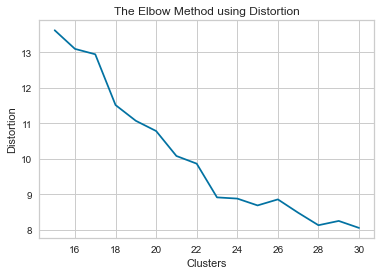

In [16]:
plt.plot(N, distortions, 'bx-') 
plt.xlabel('Clusters') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

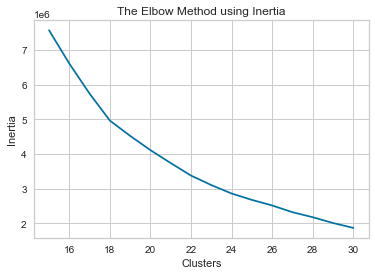

In [17]:
plt.plot(N, inertias, 'bx-') 
plt.xlabel('Clusters') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [20]:
# Model @ 22 Clusters 
kmeanModel = KMeans(n_clusters=22,init='k-means++', n_init=100,max_iter=300, algorithm='auto').fit(dataset) 
kmeanModel.fit(dataset) 

KMeans(n_clusters=22, n_init=100)

In [21]:
# Cluster Distribution 
Counter(kmeanModel.labels_)

Counter({1: 33,
         8: 993,
         21: 7750,
         11: 126,
         7: 59,
         4: 81,
         18: 190,
         13: 272,
         20: 59,
         16: 49,
         2: 141,
         17: 398,
         9: 213,
         0: 2132,
         5: 584,
         12: 81,
         6: 17,
         3: 14,
         10: 31,
         19: 16,
         14: 3,
         15: 4})